# Assignment 5
#### Due October 21, 2020, 23:59

In this week's assignment, we will investigate a dataset through different types of plots, and use these plots to describe the properties of the dataset.

We are going to investigate the famous iris dataset, a database of iris flowers. The dataset is given in the file `iris.data` which contains a collection of iris flowers, one flower per row, each described by four attributes and the class it belongs to:

1. sepal length in cm
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class:
    - 0 = Iris Setosa
    - 1 = Iris Versicolour
    - 2 = Iris Virginica

You can find more details on the dataset [here](https://archive.ics.uci.edu/ml/datasets/iris).

![data description](img/iris.jpg)

## Submission
All exercises this week, apart from exercise 1, amount to plotting a figure. The libraries you will need are already given, any extra imports are not allowed.

Implement your solution to each of the exercises in the code field below the exercise description.

- Edit and turn in this jupyter notebook file containing your solutions to each task -- keep the name `assignment5.ipynb`.
- Make sure that we are able to run the notebook by placing our own copy of `iris.data` inside the same folder as this notebook.

## Assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Exercise 1
Let's start out by inspecting our data. Load the data from the file, `iris.data`, into a numpy array. 

Extract the features (sepal length, sepal width, petal length, and petal width) into a variable, `X`, and the class into a variable, `y`. Make sure to look at what kind of values are contained in `y`.

**NB!** `iris.data` is formatted as a whitespace-delimited data file and can be loaded using `np.loadtxt()` with default parameters.
___

Shape of `X`: `(150,4)` 
Shape of `y`: `(150,)`

In [2]:
data = np.loadtxt("iris.data")
X,y = data[:,:4], data[:,4]

print("Shape of x: {}\nShape of y: {}".format(X.shape, y.shape))

Shape of x: (150, 4)
Shape of y: (150,)


## Exercise 2
When dealing with datasets we are often interested in the contained class distribution to observe if they are balanced or skewed. 

Plot a bar-plot that displays the frequency of each class of flower (0=Iris Setosa, 1=Iris Versicolor, and 2=Iris Virginica) to see if the classes are balanced. 

The plot **must** have named labels for the x and y axis, and a title. The labels on the x-axis should be the actual name of the class, not the integer representation.

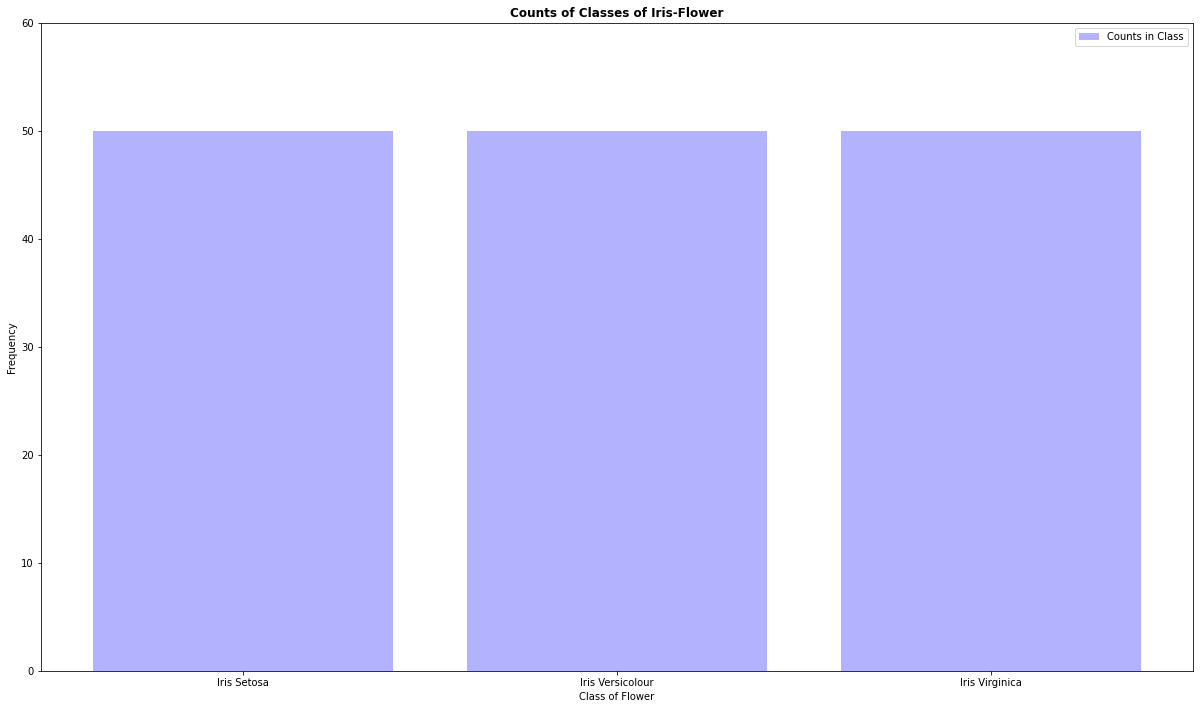

In [3]:
# get the unique classes and their counts
classes, counts = np.unique(y, return_counts=True)

# initialise the figure with one axis
fig = plt.figure(figsize=(16, 9))
fig.patch.set_facecolor("w") # set figure background to be white
axes = fig.add_axes([0, 0, 1, 1])

# plot the bar-plot of frequency of classes of flowers
axes.bar(classes, counts, fc="blue", alpha=0.3, label= "Counts in Class")

# label the plotted figure 
axes.set_xlabel('Class of Flower'); axes.set_ylabel('Frequency'); axes.set_title('Counts of Classes of Iris-Flower', fontweight="bold");
axes.set_yticks([i*10 for i in range(7)]);
axes.set_xticks(classes);
axes.set_xticklabels(("Iris Setosa", "Iris Versicolour", "Iris Virginica"));
axes.legend();

## Exercise 3
We'd like to investigate how the features of each flower distribute within each class. 

For each of the three classes of flower, plot a histogram for each feature (sepal length, sepal width, petal length, and petal width). Also, for each histogram, fit a normal distribution to the data, and plot it on top of the histogram. 

This should amount to 3x4 figures. 

The plots **must** have named labels for the x and y axis, and a title.
___

Example of a single unrelated histogram plot with its normal distribution plotted on top (missing axis labels and title):

<img src="img/hist.png" align="left" width="300">

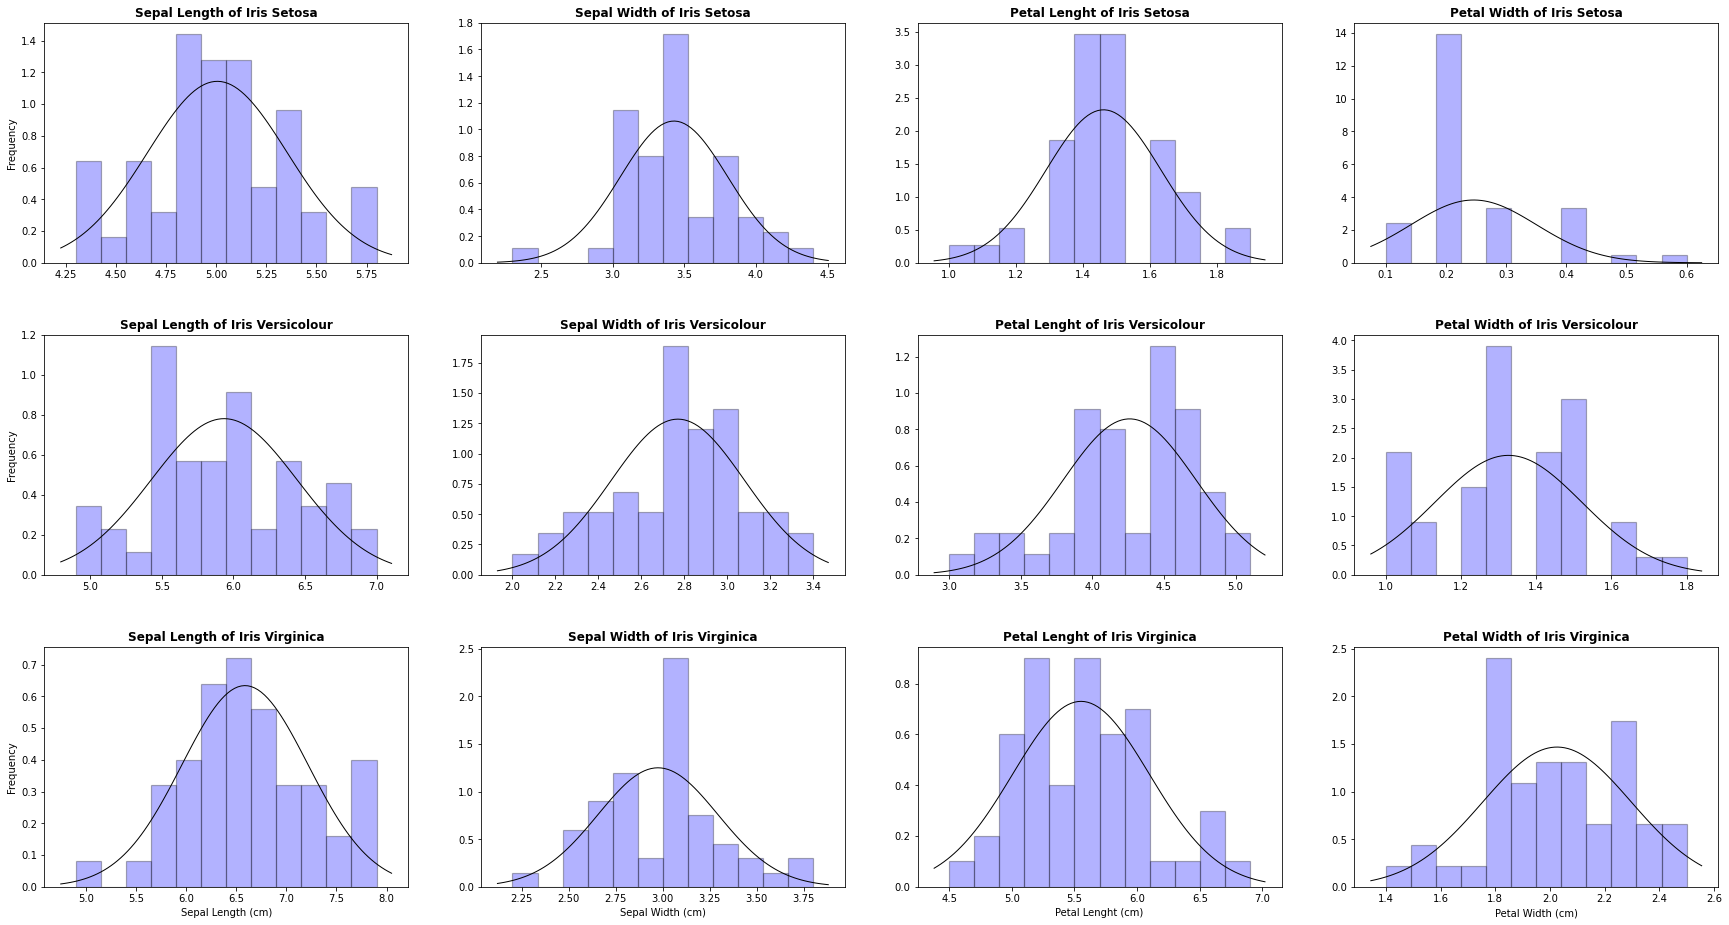

In [5]:
classes = ["Iris Setosa", "Iris Versicolour", "Iris Virginica"]
attributes = ["Sepal Length", "Sepal Width", "Petal Lenght", "Petal Width"]

# initalising 12 subplots in one figure
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30, 15))
fig.subplots_adjust(bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3) # adjust the spacing
fig.patch.set_facecolor("w") # set figure background to be white
    
for x in range(3):
    mask = y == x
    for i in range(4):
        # plot the histogram
        axes[x][i].hist(X[:,i][mask], 12, density=True, color="blue", alpha=0.3, edgecolor="k", linewidth=1.2);
            
        # find mu and sigma for each attribute
        mu, sigma = stats.norm.fit(X[:,i][mask])

        # plot the normal distribution fit 
        xmin, xmax = axes[x][i].get_xlim()
        z = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(z, mu, sigma)
        axes[x][i].plot(z, p,"k", linewidth=1);
        
        # labeling the plots
        axes[x][i].set_title("{} of {}".format(attributes[i], classes[x]), fontweight="bold");
        if x == 2:
            axes[x][i].set_xlabel("{} (cm)".format(attributes[i]))
        if i == 0:
            axes[x][i].set_ylabel("Frequency")

## Exercise 4
Now that we know how the features are distributed across classes and features we'd like to visually inspect how these features relate across classes. 

Extract the samples that belong to the two classes 0 and 1 (Iris Setosa and Iris Versicolor) and create a scatter-plot of the sepal values (feature 1 and 2) for the two classes in **one** plot. Then fit a regression line to each of the classes and plot the line on top of the scatter plot. Give the two classes different colors so that you can easily distinguish the different samples. 

The plot **must** have named labels for the x-axis, y-axis, a title, and a legend.

Hint: To produce the regression line use `stats.linregress`
___

Example with three classes plotted for the features 1 and 3 -- yours should only have the two classes, Setosa and Versicolor, and they should be plotted for the features 1 and 2.

<img src="img/scatter.png" align="left" width="350">

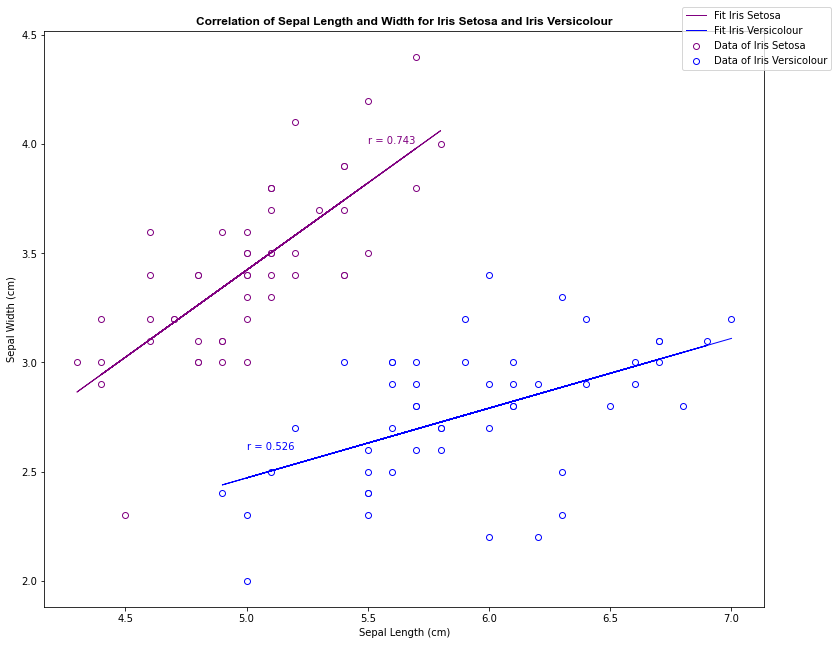

In [6]:
mask_setosa = y == 0
mask_versicolour = y == 1
masks = [mask_setosa, mask_versicolour]

fig = plt.figure(figsize=(10, 8))
fig.patch.set_facecolor("w") # set figure background to be white
axes = fig.add_axes([0, 0, 1, 1])

# plot data points
axes.scatter(X[:,0][masks[0]], X[:,1][masks[0]], label="Data of {}".format(classes[0]), color="w", edgecolors="purple");
axes.scatter(X[:,0][masks[1]], X[:,1][masks[1]], label="Data of {}".format(classes[1]), color="w", edgecolors="blue");

# plot fits 
slope, intercept, r_value, _, _ = stats.linregress(X[:,0][masks[0]], X[:,1][masks[0]])
axes.plot(X[:,0][masks[0]], slope * X[:,0][masks[0]] + intercept, linewidth=1, color="purple", label="Fit {}".format(classes[0]))
axes.text(5.5, 4.0, "r = " + str(round(r_value, 3)), color="purple")

slope, intercept, r_value, _, _ = stats.linregress(X[:,0][masks[1]], X[:,1][masks[1]])
axes.plot(X[:,0][masks[1]], slope * X[:,0][masks[1]] + intercept, linewidth=1, color="blue", label="Fit {}".format(classes[1]))
axes.text(5.0, 2.6, "r = " + str(round(r_value, 3)), color="blue")

axes.legend(bbox_to_anchor=(1.1, 1.05)); axes.set_xlabel("Sepal Length (cm)"); axes.set_ylabel("Sepal Width (cm)"); axes.set_title("Correlation of Sepal Length and Width for Iris Setosa and Iris Versicolour", fontname="Arial", fontweight="bold");